In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import warnings
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from pylab import savefig
from sklearn.cluster import KMeans
from matplotlib import style
style.use('ggplot')

In [61]:
temp = pd.read_csv('2010.csv', encoding='latin-1')
temp.shape #matrix size

(220, 5)

In [62]:
#make a square matrix
temp = temp[temp.Agri !=0]
temp.shape

(214, 5)

In [63]:
country=temp.ix[:,0]
shares = temp.ix[:,[2,3,4]] 

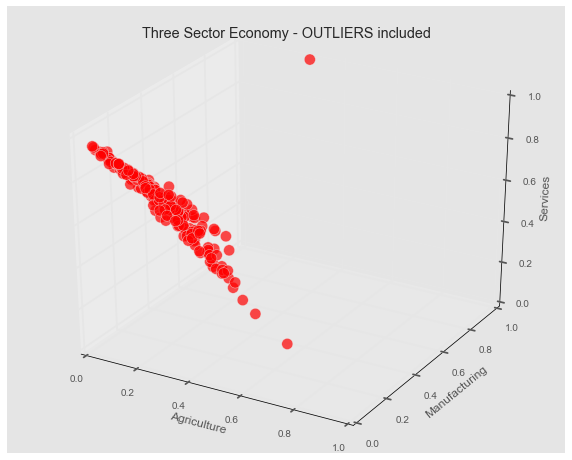

In [64]:
if 1:
    
    def onpick3(event):
        ind = event.ind
        print('country', np.take(country, ind))
    
    fig = plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111,projection='3d')

    ax.scatter(shares['Agri'], shares['Manu'], shares['Serv'], c='r', alpha=0.7, s = 124, picker=True)
    ax.set_title('Three Sector Economy - OUTLIERS included')
    ax.set_xlabel('Agriculture')
    ax.set_xlim([0,1])
    ax.set_ylabel('Manufacturing')
    ax.set_ylim([0,1])
    ax.set_zlabel('Services')
    ax.set_zlim([0,1])    

    fig.canvas.mpl_connect('pick_event',onpick3)

plt.show()

In [65]:
outliertag = abs(shares-np.mean(shares))<3 * np.std(shares) #False = outlier ; 3 = number of SD (99%)
df_outliertag = shares*outliertag
df_outliertag = pd.concat([country, df_outliertag], axis=1) #merge

finaldf = df_outliertag.loc[(df_outliertag!=0).all(axis=1)] 
finaldf = finaldf.dropna()

In [66]:
shares = finaldf.ix[:,[1,2,3]]
shares.shape

(206, 3)

In [67]:
pd.isnull(shares).any(1).nonzero()[0] #check for null values

array([], dtype=int64)

In [68]:
df_outliertag.shape #confirm matrix size

(214, 4)

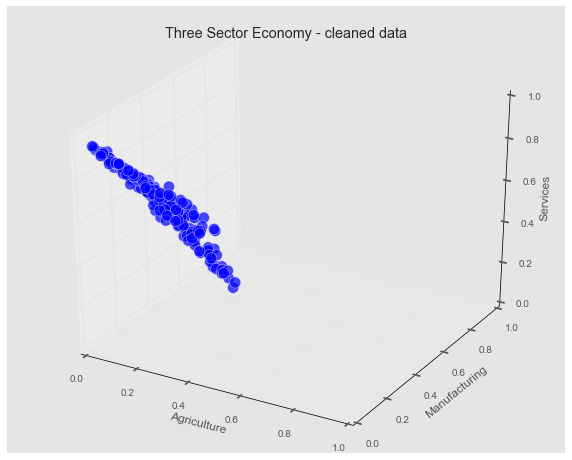

In [69]:
#New chart without outliers

if 1:
    
    def onpick3(event):
        ind = event.ind
        print('country', np.take(country, ind))
    
    fig = plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111,projection='3d')

    ax.scatter(shares['Agri'], shares['Manu'], shares['Serv'], c='b', alpha=0.7, s = 124, picker=True)
    ax.set_title('Three Sector Economy - cleaned data')
    ax.set_xlabel('Agriculture')
    ax.set_xlim([0,1])
    ax.set_ylabel('Manufacturing')
    ax.set_ylim([0,1])
    ax.set_zlabel('Services')
    ax.set_zlim([0,1])    

    fig.canvas.mpl_connect('pick_event',onpick3)

plt.show()


In [76]:
#Meanshift clustering for dataset "shares"
bandwidth = estimate_bandwidth(shares, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(shares)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

TypeError: unhashable type: 'slice'

In [43]:
#Elbow method

K = range(1,20) # range of elbows can be from 1-20
KM = [KMeans(n_clusters=k).fit(shares) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(shares, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/shares.shape[0] for d in dist]
wcss = [sum(d**2) for d in dist] 
tss = sum(pdist(shares)**2)/shares.shape[0] 
bss = tss - wcss
ss_table = bss/tss*100
plt.plot(ss_table)
plt.show()

In [25]:
#How many clusters should there be?

def match (table, target):
    for over in range(len(table)):
        if table[over] >= target:
            break

    return over+1 if 2*target > table[over-1] + table[over] \
        else over

n_clusters = match(ss_table,90)  # the number of clusters that will explain 90% of the variance.
n_clusters

8

In [ ]:
#K-Means

n_clusters = 3 #to overwrite how many clusters you like



K-means force fits dots into equal buckets, so maybe meanshift is better

In [28]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

Automatically created module for IPython interactive environment
